In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats


df = pd.read_csv('Data/data (1).csv')

In [122]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [124]:
df['VitD_levels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: VitD_levels
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


<AxesSubplot:xlabel='VitD_levels', ylabel='Age'>

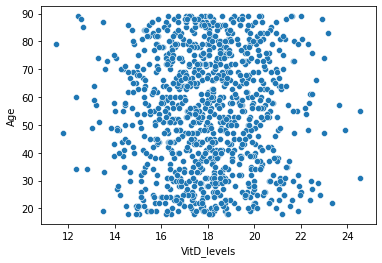

In [125]:
sns.scatterplot(data = df, x = 'VitD_levels', y = 'Age')

In [126]:
col = 'VitD_levels'

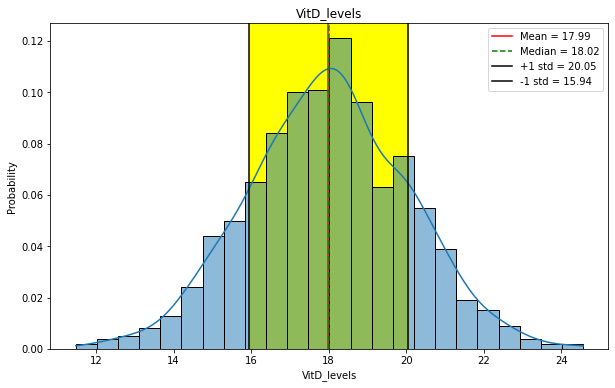

In [127]:
#def dispersion(col):
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax=ax, stat='probability',kde=True)
ax.axvline(mean, color = 'r', label = f'Mean = {mean:,.2f}',)
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [128]:
def cont_dispersion(col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature, ax=ax, stat='probability', kde = True)
    ax.axvline(mean, color = 'r', label = f'Mean = {mean:,.2f}',)
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

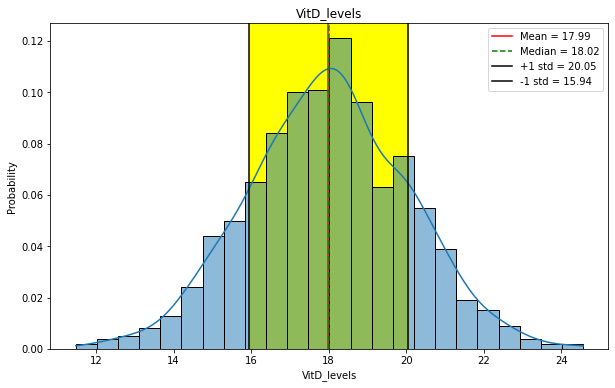

In [129]:
dispersion('VitD_levels')

In [140]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

In [130]:
def discrete_dispersion(col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature, ax=ax, discrete=True,stat='probability', kde = True)
    ax.axvline(mean, color = 'r', label = f'Mean = {mean:,.2f}',)
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

<AxesSubplot:xlabel='Doc_visits', ylabel='Age'>

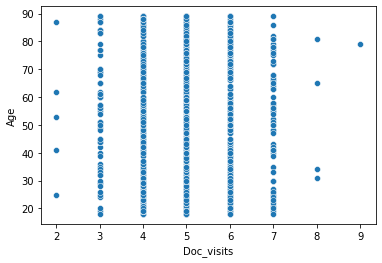

In [131]:
sns.scatterplot(data = df, x = 'Doc_visits', y = 'Age')

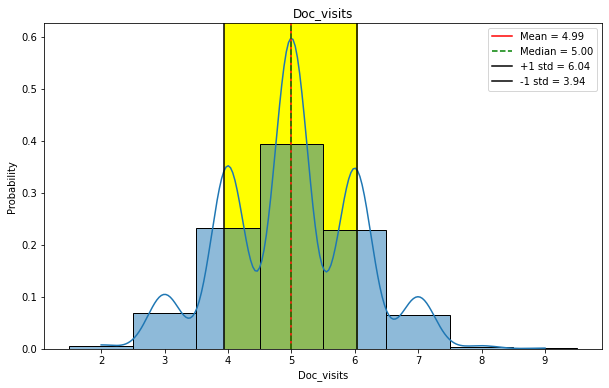

In [132]:
discrete_dispersion('Doc_visits')

In [139]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

<AxesSubplot:xlabel='TotalCharge', ylabel='Age'>

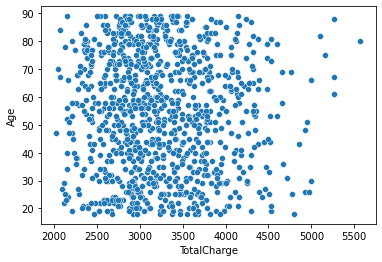

In [133]:
sns.scatterplot(data = df, x = 'TotalCharge', y = 'Age')

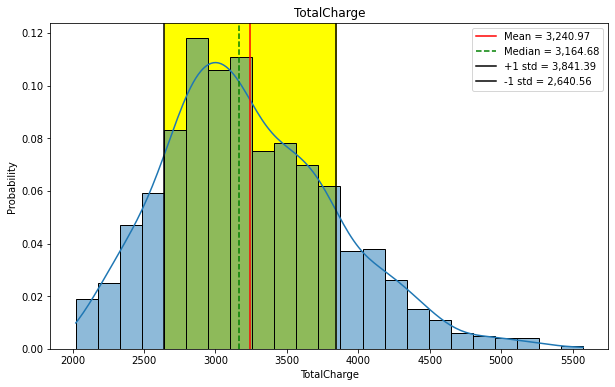

In [134]:
cont_dispersion('TotalCharge')

In [138]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

# VitD levels
    Continuous
    No skew
    Mesokurtic

# Doc Visits
    Discrete
    no skew
    Mesokurtic

# Total Charge
    Continuous
    Positive Skew
    mesokurtic